In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
def displayImage(x):
    plt.imshow(x.reshape(28,28),cmap=plt.cm.binary,interpolation="nearest")
    plt.show

In [3]:
def displayPredict(clf, actually_y,x):
    print("Actually : ",actually_y)
    print("Prediction : ",clf.predict([x])[0])

In [4]:
def displayConfusionMatrix(cm,cmap=plt.cm.GnBu):
    classes=["Other Number","Number 0"]
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    trick_marks=np.arange(len(classes))
    plt.xticks(trick_marks,classes)
    plt.yticks(trick_marks,classes)
    thresh=cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),
        horizontalalignment='center',
        color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actually')
    plt.xlabel('Prediction')
    plt.show()

In [5]:
minist_raw = loadmat("data\mnist-original.mat")

In [6]:
mnist={
    "data":minist_raw["data"].T,
    "target":minist_raw["label"][0]
}

x,y = mnist["data"],mnist["target"]

In [7]:
#training, test

#1-60000

#60001 - 70000

In [8]:
#Training & Test Set
# class 0 - 9
x_train, x_test, y_train, y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [10]:
# class 0, ไม่ใช่ class 0
# ข้อมูลค่า 5000 -> model -> class 0 หรือไม่ ? true : false
# y_train = [0,0,.........,9,...,9]
predict_number = 1000
y_train_0 = (y_train==0)
y_test_0 = (y_test==0)

#y_train_0 = [true, true,.......,false...,false]


In [11]:
print(y_train_0)
print(y_train_0.shape)
print("\n")
print(y_test_0)
print(y_test_0.shape)

[ True  True  True ... False False False]
(60000,)


[ True  True  True ... False False False]
(10000,)


In [12]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_0)

SGDClassifier()

Actually :  False
Prediction :  False


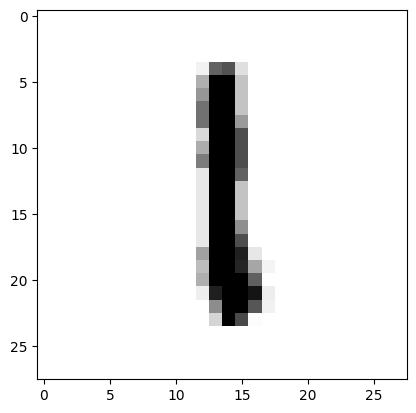

In [13]:
displayImage(x_test[predict_number])
displayPredict(sgd_clf,y_test_0[predict_number],x_test[predict_number])

In [14]:
score = cross_val_score(sgd_clf,x_train,y_train_0,cv=3,scoring="accuracy")
print(score) 

[0.9684  0.95225 0.9742 ]


In [15]:
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_0,cv=3)
cm = confusion_matrix(y_train_0,y_train_pred)

print(cm)

[[52561  1516]
 [  434  5489]]


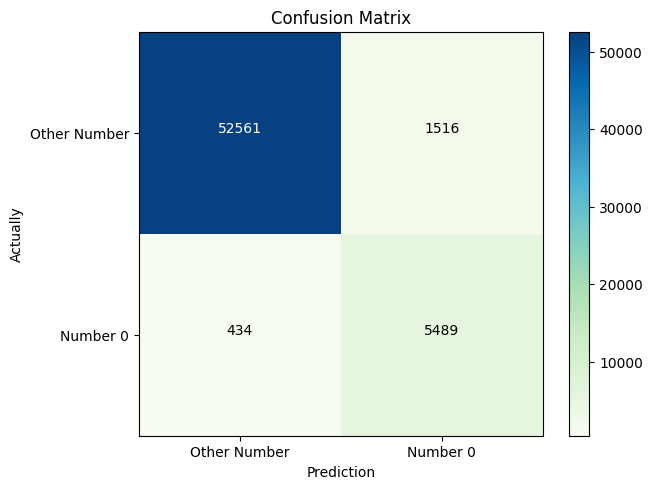

In [16]:
plt.figure()
displayConfusionMatrix(cm)


In [17]:
y_test_pred = sgd_clf.predict(x_test)

classes = ['Other Number', 'Number 0']
print(classification_report(y_test_0,y_test_pred,target_names=classes))

              precision    recall  f1-score   support

Other Number       1.00      0.98      0.99      9020
    Number 0       0.86      0.98      0.92       980

    accuracy                           0.98     10000
   macro avg       0.93      0.98      0.95     10000
weighted avg       0.98      0.98      0.98     10000



In [18]:
print("Accuracy Score : ",accuracy_score(y_test_0,y_test_pred)*100)

Accuracy Score :  98.22999999999999
